# <Center>**Linear Methods for Regression**</Center>


![linear_regression](./pics/linear_regression.svg)

## Goal of lecture 11

* Concetps of machine learning. 
* What is regression problem, how linear regression works. 什么是回归问题，线性回归如何工作。
* Model, Train, Fit, Predict, Loss Function, Optimisation, Overfit, Underfit, Generalisation
* 模型，训练，拟合，预测，损失函数，优化，过度拟合（训练数据表现很好，但是测试数据表现不好），欠拟合（拟合程度不够，预测公式不够好预测下一个点），泛化
* Implementation  实施

**Quote from ESL (Element of Statistical Learning)** 

> it is our firm belief that an understanding of linear methods is essential for understanding nonlinear ones. In fact, many nonlinear techniques are direct generalizations of the linear methods discussed here


**Quote from [Andrew Ng](https://zh.wikipedia.org/wiki/%E5%90%B4%E6%81%A9%E8%BE%BE)**
> funny 95%的硅谷做AI的engineer都不懂线性回归，而当你懂了线性回归后，你就超过了大多数硅谷搞AI的人，可以去申请Offer了。

## Univariate Linear Regression  一元线性回归

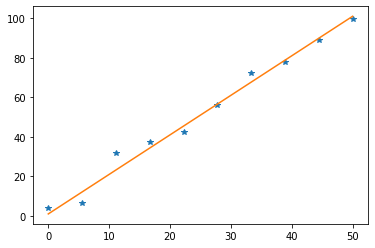

In [2]:
import numpy as np              #把numpy包调入
import matplotlib.pyplot as plt

n = 10                      #变量=10
mu, sigma = 0, 4            #赋值 均值为0 方差为4
x = np.linspace(0, 50, n)   #0 - 50 取10个点
e = np.random.normal(mu, sigma, n) #一个随机的正态分布
y = 2 * x + 1 + e           # e 是误差项
y_fit = 2 * x + 1           #实际的线

plt.plot(x, y, '*')   
plt.plot(x, y_fit, '-')  #这条线是对所有点的拟合
plt.show()

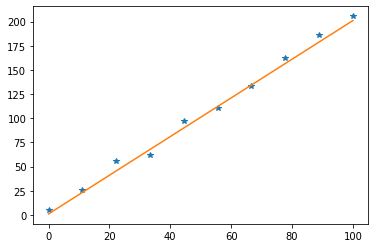

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n =10
mu,sigma = 1,6
x = np.linspace(0, 100, n)  #划线的函数 np.linespace 从0开始到100，间隔为10 
e = np.random.normal(mu, sigma, n) 
y = 2 * x + 1 + e           # e 是误差项
y_fit = 2 * x + 1           #实际的线

plt.plot(x, y, '*')   
plt.plot(x, y_fit, '-')  #这条线是对所有点的拟合
plt.show()

point1 = (1,3)

point2 = (2,5)

point3 = (3,6)

**Q: How to find a line $y = \beta_1x + \beta_0$ to best fit these 3 points?**

最小二乘法  求导=0  两个方程联立求解
求导的话就是斜率，当斜率等于0 的时候，也就是与函数的切线水平，取得最小值。
在现实例子里面（真实值-预测值）误差最小，才是我们想要的  https://zh.wikipedia.org/wiki/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95

The least square method is to try to minimize the squared error of both sides, which is to find the minimum value of this function.
Do the Partial derivative.


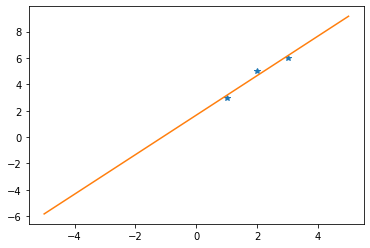

In [3]:
import numpy as np
import matplotlib.pyplot as plt  # 把 matplotlib.pyplot 命名为  plt  约定俗成的写法

X1 = np.array([1,2,3])
Y1 = np.array([3,5,6])    # 三个点
X2 = np.linspace(-5,5,10)
Y2 = 1.5 * X2 + 1.66667

plt.plot(X1, Y1, '*')
plt.plot(X2, Y2, '-')
plt.show() 

In [5]:
import pandas
from sklearn.model_selection import train_test_split  # 
from sklearn.linear_model import LinearRegression     #  LinearRegression 一个类

dataset = pandas.read_csv('data/salary.csv') #用pandas读入

In [6]:
dataset.head() # 打印前5行

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


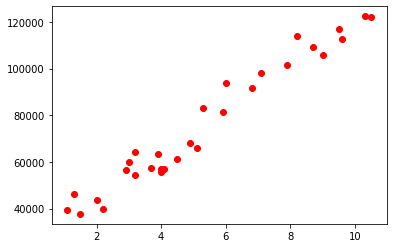

In [7]:
#x = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 1].values
x = dataset[['years_experience']].values  # dataset 是一个函数 key:value, 取出来 value
y = dataset[['salary']].values
plt.scatter(x, y, color = 'red') # scatter() 画散点图

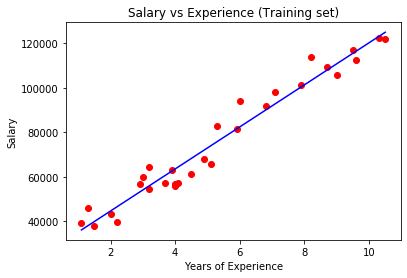

In [9]:
# LinearRegression 是 sklearn.linear_mode包里面，计算一个线性回归的一个类，已经封装好了，直接调用

linearRegressor = LinearRegression()
linearRegressor.fit(x, y)                 # fit() 就相当于training 的形式，把线fit到这些点上，上面的x,y 
                                          #会直接计算好，并且存放在这个类里面，下面就可以做prediction
prediction = linearRegressor.predict(x)   # 给出 x ，算出y，因为已经算出了方程式
#到这里 （x,y）-> （x,prediction）

plt.scatter(x, y, color = 'red')         # 使用真实值画出  散点图
plt.plot(x, prediction, color = 'blue')  # 使用预测值画出的线图，进行预测

plt.title('Salary vs Experience (Training set)')  # 设置的图的title
plt.xlabel('Years of Experience')         # x轴 的命名
plt.ylabel('Salary')                      # y  轴的命名
plt.show()                                #我通过我的红色的实际数据，统计数据，观测数据，我学习出来了一条蓝色的数学模型，这条线最好的
                                          #拟合了我们的散点，这条蓝线就可以用来做，工作年限和salary 的预测

In [10]:
print(linearRegressor.coef_)       # coef_ 系数  对于一元线性回归只有一个值，对于n元线性回归有n个值
print(linearRegressor.intercept_)  #intercept_ 截距 永远只有一个值
y = 9449.96232146 * x + 25792.20019867
#y = a X + B

[[9449.96232146]]
[25792.20019867]


In [11]:
print(linearRegressor.score(x[:20],y[:20]))

1.0


## Basic Concept

* Model
* Fit
* Optimisation  优化
* Feature, Predictor 预测参数, Dimension 几个预测元素，维度 几维的

In [12]:
在实际工作中，主要是 从没有得到有，如果从有要得到更有，时间，经历会花费更多。把精确率往上提一个点的时候，回报率
会很小。

SyntaxError: invalid character in identifier (<ipython-input-12-d06255bde079>, line 1)

<hr/>

## Main Idea

$$ f(x) = \beta_0 + \sum_{j=1}^p x_j \beta_j $$

* $\beta_j$, parameters or coeffcients  参数，系数
* $p = 1$, univariate linear regression model  一元线性回归
* $p > 1$, multiple linear regression model  多元线性回归

$$ f(x) = \sum_{j=0}^p x_j\beta_j $$

* assume $x_0$ is 1

### *Least sequares* to estimate $\beta$          关于 $\beta$的最小二乘法
* RSS = Residual Sum of Squares  残差平方和

$$ RSS(\beta) = \sum_{i=1}^N (y_i - f(x_i))^2 $$

* Find $\hat \beta$ to minimize $RSS(\beta)$ 

$$ \hat \beta = \arg_{\beta} \min\{ \sum_{i=1}^N (y_i - f(x_i))^2 \} $$

### Differentiating with respect to $\beta$   对$\beta$ 求导 

$$ RSS(\beta) = (y-X\beta)^T(y-X\beta) $$

$$ \frac {\partial RSS}{\partial \beta} = -2X^T(y - X\beta) = 0 $$

$$ X^T(y - X\beta) = 0 $$

* $\hat y$ is the orthogonally projection onto the hyperplane spanned by the input vectors. 

$$ \hat \beta = (X^TX)^{-1}X^Ty$$

### 2 main problems of Least Square Estimate  最小二乘法的两个主要问题

* Low bias but large variance  偏差小，方差大
* Hard to interpreate for large number of predictors 难以解释大量预测变量

![bias_variance](./pics/bias_variance.png)

### Solutions     变种

这三种方式都是为了减少系数，避免过拟合的问题，以便于适合更多的数据和预测
* Shrinkage Methods  收缩方法
  * **Ridge** regression  岭 回归分析
  * **LASSO** (Least Absolute Shrinkage and Selection Operator) regression  拉锁回归
  * **ElasticNet** regression   弹性网络回归

## Ridge Regression

在后面添加了\lambda \ ，不希望系数太多 减少过拟合的几率
$$ \hat \beta = \arg_{\beta} \min\{ \sum_{i=1}^N (y_i - f(x_i))^2 + \lambda \sum_{j=1}^p \beta_j^2 \} $$

$$ \hat \beta = (X^TX + \lambda I)^{-1}X^Ty$$

## LASSO Regression

添加了绝对值加和  减少系数

$$ \hat \beta = \arg_{\beta} \min\{ \sum_{i=1}^N (y_i - f(x_i))^2 + \lambda \sum_{j=1}^p |\beta_j| \} $$

* Optimisation is a quadratic programming problem (二次规划问题)

## ElasticNet Regression

$$ \hat \beta = \arg_{\beta} \min\{ \sum_{i=1}^N (y_i - f(x_i))^2 + \lambda (\sum_{j=1}^p \alpha \beta_j^2  + (1-\alpha)|\beta_j|) \} $$

## Additional Materials

[Gauss–Markov Theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem)
* **B**est **L**inear **U**nbiased **E**stimator (BLUE) of the coefficients is given by the **O**rdinary **L**east **S**quares (OLS) estimator, provided it exists.
* Best means **lowest variance** estimator among all **unbiased** linear estimators.
* The theorem was named after Carl Friedrich Gauss and Andrey Markov
无偏性的话，最小二乘法是最好的方法

<hr/>

## Sample Project

### Business Goal
Use Linear Regression to Predict Unemployment
使用线性回归预测失业率

### Data

In [67]:
! ls ./data/unemployment/raw/

'ls' is not recognized as an internal or external command,
operable program or batch file.


**Features or Predictors**
* PCE.csv - personal consumption expenditures, in billions of dollars 个人消费支出，数十亿美元
* POP.csv - total population, in thousands
* PSAVERT.csv - personal savings rate  个人存储率
* UEMPMED.csv - median duration of unemployment, in weeks

**Dependent Variable or Target**  变量和目标
* UNEMPLOY.csv - number of unemployed in thousands 

In [10]:
! ls ./data/unemployment/

'ls' is not recognized as an internal or external command,
operable program or batch file.


* unemployment_data.csv - join all above data on DATE, this is the final data format we will use for the project.

### Implementation with scikit-learn

In [30]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
# read data into a pandas dataframe  读入数据 付到 df
df = pd.read_csv('./data/unemployment/unemployment_data.csv')

In [32]:
# shape of the dataframe, how many lines and how many columns
print(df.shape)  # 625行 5列

(625, 5)


In [33]:
# show first 5 lines of the data
df.head()

,PCE,POP,PSAVERT,UEMPMED,UNEMPLOY
0,506.7,198712.0,12.6,4.5,2944
1,509.8,198911.0,12.6,4.7,2945
2,515.6,199113.0,11.9,4.6,2958
3,512.2,199311.0,12.9,4.9,3143
4,517.4,199498.0,12.8,4.7,3066


In [34]:
# show quick statistics about the dataframe
df.describe()  # 算出统计值 count,mean,min...

,PCE,POP,PSAVERT,UEMPMED,UNEMPLOY
count,625.000000,625.000000,625.000000,625.000000,625.000000
mean,5515.764640,262709.367058,8.467840,8.733120,7713.380800
std,4137.069957,39791.444228,2.865193,3.964802,2548.928004
min,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,1747.100000,227726.000000,6.400000,6.100000,6294.000000
50%,4468.900000,260255.000000,8.000000,7.900000,7459.000000
75%,9321.800000,298996.000000,10.900000,9.500000,8576.000000
max,14661.100000,329394.993000,17.300000,25.200000,15352.000000


In [35]:
target_column = ['UNEMPLOY']  # 新的变量
target_column

['UNEMPLOY']

In [36]:
predictors = list(set(list(df.columns))-set(target_column))  #  选择了4列出来  把target_column = ['UNEMPLOY']
#这一列删掉
predictors

['PCE', 'UEMPMED', 'PSAVERT', 'POP']

In [37]:
# X is a vector of predictors, y is the target
X = df[predictors].values
y = df[target_column].values

In [38]:
X

array([[5.06700000e+02, 4.50000000e+00, 1.26000000e+01, 1.98712000e+05],
       [5.09800000e+02, 4.70000000e+00, 1.26000000e+01, 1.98911000e+05],
       [5.15600000e+02, 4.60000000e+00, 1.19000000e+01, 1.99113000e+05],
       ...,
       [1.45177000e+04, 9.10000000e+00, 8.00000000e+00, 3.29047319e+05],
       [1.45680000e+04, 9.60000000e+00, 8.00000000e+00, 3.29213989e+05],
       [1.46611000e+04, 8.90000000e+00, 7.70000000e+00, 3.29394993e+05]])

In [39]:
y

array([[ 2944],
       [ 2945],
       [ 2958],
       [ 3143],
       [ 3066],
       [ 3018],
       [ 2878],
       [ 3001],
       [ 2877],
       [ 2709],
       [ 2740],
       [ 2938],
       [ 2883],
       [ 2768],
       [ 2686],
       [ 2689],
       [ 2715],
       [ 2685],
       [ 2718],
       [ 2692],
       [ 2712],
       [ 2758],
       [ 2713],
       [ 2816],
       [ 2868],
       [ 2856],
       [ 3040],
       [ 3049],
       [ 2856],
       [ 2884],
       [ 3201],
       [ 3453],
       [ 3635],
       [ 3797],
       [ 3919],
       [ 4071],
       [ 4175],
       [ 4256],
       [ 4456],
       [ 4591],
       [ 4898],
       [ 5076],
       [ 4986],
       [ 4903],
       [ 4987],
       [ 4959],
       [ 4996],
       [ 4949],
       [ 5035],
       [ 5134],
       [ 5042],
       [ 4954],
       [ 5161],
       [ 5154],
       [ 5019],
       [ 4928],
       [ 5038],
       [ 4959],
       [ 4922],
       [ 4923],
       [ 4913],
       [ 4939],
       [

In [40]:
# split dataset into 2 parts, training dataset and test dataset
# Purpose is to see how good or bad the model (prediction) is on un-seen data
#数据   预测集 和 测试集     做一个20%的划分， 80%的数据用来做预测， 20%的数据用来做测试    
#  random_state=2019 控制伪随机序列
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2019)

In [41]:
print(X_train.shape)
print(X_test.shape)

(500, 4)
(125, 4)


<hr/>

### Now data is all set, we are ready to build a model and make predictions
#### [Standard Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [70]:
# create a linear regression object lr
lr = LinearRegression()
# fitting, trainning  
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
# now we have a model, we can use it for prediction
#在训练数据上 
pred_train_lr= lr.predict(X_train)   # 给出 X_train ，算出y 付给变量 pred_train_lr

print(np.sqrt(mean_squared_error(y_train, pred_train_lr)))  # 原始值y - 预测y  下面的公式 误差平方和
print(r2_score(y_train, pred_train_lr))      # r2_score 越接近 1 越好

969.7755899556098
0.8525458768631426


In [72]:
# 在测试数据中

pred_test_lr= lr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

1020.290065765756
0.8495883980227337


$r2 = 1 - \frac {\sum (y - \hat y)^2} {\sum (y - \overline y)^2}$

In [73]:
# r2 表示预测值跟真实值之间的偏差程度  1 后面的那一堆肯定是一个小数，当r2越接近于1的时候越好

In [74]:
error = (pred_test_lr - y_test) * 100 / y_test
error.round(1)  # round() 显示小数点后面几位

array([[  8.8],
       [-13.6],
       [  6.4],
       [ -3.5],
       [-26.5],
       [-13.5],
       [ 12.4],
       [  6.9],
       [ -5.1],
       [-15.1],
       [ 27.5],
       [  6. ],
       [ -0.7],
       [ 18. ],
       [ -6.7],
       [ 17.2],
       [  6.8],
       [  2.6],
       [  4.9],
       [ -4.6],
       [  2.7],
       [ 12.2],
       [  9.7],
       [-13.8],
       [ 32.6],
       [ -3.5],
       [ -2.6],
       [ -1.4],
       [-17.7],
       [ 35.7],
       [ 28. ],
       [ -0.9],
       [ -4.4],
       [ -4.5],
       [ 26.9],
       [  1.4],
       [-10.9],
       [-10.4],
       [ -8.1],
       [ -7.5],
       [ 20.8],
       [ -1.2],
       [ 15. ],
       [ -6.8],
       [ -5.5],
       [-11.5],
       [ 32.4],
       [ 10. ],
       [ 18.7],
       [ 31. ],
       [ -3.7],
       [ 15.7],
       [  1.8],
       [  1.4],
       [  1.2],
       [ 10. ],
       [  6.9],
       [ 14.8],
       [ -1.5],
       [ 18.2],
       [ -8.9],
       [  8.9],
       [

In [75]:
print(lr.coef_)       # 系数
print(lr.intercept_) # 截距 常数项

[[-1.47006100e+00  5.48488587e+02  2.48484059e+02  1.61845371e-01]]
[-33536.8369084]


In [76]:
# PCE, POP, PSAVERT, UEMPMED  在测试集上
X_test

array([[7.04710000e+03, 6.30000000e+00, 4.50000000e+00, 2.84810000e+05],
       [2.64080000e+03, 7.10000000e+00, 9.10000000e+00, 2.37602000e+05],
       [1.03921000e+04, 2.19000000e+01, 7.10000000e+00, 3.10781705e+05],
       [1.70820000e+03, 6.00000000e+00, 1.02000000e+01, 2.26849000e+05],
       [9.76600000e+03, 1.17000000e+01, 5.50000000e+00, 3.06402000e+05],
       [2.83520000e+03, 6.70000000e+00, 9.70000000e+00, 2.40094000e+05],
       [7.81100000e+02, 5.60000000e+00, 1.22000000e+01, 2.10278000e+05],
       [7.67860000e+03, 1.15000000e+01, 5.60000000e+00, 2.90584000e+05],
       [8.64560000e+03, 9.00000000e+00, 3.10000000e+00, 2.95490000e+05],
       [2.22640000e+03, 1.09000000e+01, 1.03000000e+01, 2.33781000e+05],
       [8.32800000e+02, 5.50000000e+00, 1.27000000e+01, 2.11254000e+05],
       [6.65600000e+02, 5.90000000e+00, 1.32000000e+01, 2.06238000e+05],
       [8.21890000e+03, 8.90000000e+00, 5.30000000e+00, 2.93463000e+05],
       [6.52900000e+02, 5.40000000e+00, 1.34000000e

In [77]:
pred_test_lr

array([[ 6772.33281044],
       [ 7191.28385085],
       [15260.85951566],
       [ 6491.93448103],
       [ 9480.27164116],
       [ 7238.51765775],
       [ 5450.46106844],
       [ 9903.95758117],
       [ 7283.99036864],
       [ 9564.50346873],
       [ 5601.81316769],
       [ 5379.42844837],
       [ 8075.02090077],
       [ 5020.9305558 ],
       [ 7533.83460983],
       [14205.02160498],
       [ 6522.70667737],
       [ 7090.75657492],
       [ 8884.35202927],
       [ 5847.00119542],
       [12073.65240869],
       [13794.96703596],
       [11837.33403128],
       [ 6795.97929503],
       [ 7668.26295892],
       [ 8441.4926274 ],
       [ 7321.15672832],
       [ 6831.42196361],
       [12019.56462881],
       [ 5963.3575547 ],
       [ 7948.44863696],
       [ 6279.71600898],
       [ 5917.4057993 ],
       [ 6639.37373957],
       [ 7755.18692717],
       [ 8003.86708108],
       [ 6447.98293557],
       [ 6254.30444557],
       [ 6956.4473334 ],
       [ 8845.33261282],


In [78]:
# [-1.43323879  280.912275  569.969487  0.160432460]
X1 = pd.read_csv('./data/unemployment/test.csv')  # 预测值
X1

,PCE,POP,PSAVERT,UEMPMED
0,0.0,198712.0,12.6,4.5
1,509.8,0.0,12.6,4.7
2,515.6,199113.0,0.0,4.6
3,512.2,199311.0,12.9,0.0
4,506.7,198712.0,12.6,4.5
5,509.8,198911.0,12.6,4.7
6,515.6,199113.0,11.9,4.6
7,512.2,199311.0,12.9,4.9


In [51]:
Y1 = lr.predict(X1)

In [52]:
Y1

array([[ 1.08960859e+08],
       [-3.11546142e+04],
       [ 1.09176914e+08],
       [ 1.09288724e+08],
       [ 1.08960114e+08],
       [ 1.09069259e+08],
       [ 1.09179871e+08],
       [ 1.09288725e+08]])

In [53]:
(5.57931652 - 5.57938914) * 10000000 / 506.7

-1.4331951845288875

In [54]:
(5.58490623 * 10000000 + 2.74791738 * 10000) / 198911.0

280.9122747047674

In [55]:
(5.59053993 * 10000000 - 5.58986167 * 10000000) / 11.9

569.966386554747

In [56]:
(5.59615948 * 10000000 - 5.59615940 * 10000000) / 4.9

0.16326530551423832

#### [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [57]:
#岭回归

In [58]:
rr = Ridge(alpha=0.1)  # ridge() 新建一个岭回归的对象   alpha惩罚项   上面的数学公式已经存在 rr里面了
                       #但是具体 这个 alpha 参数哪一个更好呢，只能不断地拿去试
rr.fit(X_train, y_train) 

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
pred_train_rr= rr.predict(X_train)  # X_train得到的预测值
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))  
# mean_squared_error 平方和  np.sqrt() 开根号目的是检测预测值和真实值之间的误差
#  (y1-y2) 平方 然后求和 再开根号
print(r2_score(y_train, pred_train_rr))

969.7755908910011
0.8525458765786906


In [60]:
pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))    #查看上面三种预测方式对应的的公式
print(r2_score(y_test, pred_test_rr))

1020.2791330098893
0.8495916214286432


#### [LASSO Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [79]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)   # 它对应的是这个预测相应的公式，查看上面的公式
                                    #步骤已经，第一步也是进行 fit() 操作

C:\Users\kongg\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3754182.337133646, tolerance: 318900.7790582
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
#mean_squared_error 平方和  np.sqrt() 开根号目的是检测预测值和真实值之间的误差
print(r2_score(y_train, pred_train_lasso))

969.7755924031195
0.8525458761188562


In [63]:
pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

1020.2756433184367
0.8495926503194997


#### [ElasticNet Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [64]:
model_enet = ElasticNet(alpha = 0.1, l1_ratio=0.5)
model_enet.fit(X_train, y_train)

C:\Users\kongg\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8156159.821013927, tolerance: 318900.7790582
  positive)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

969.8333672554165
0.8525283062932997


In [66]:
pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

1017.6385750781553
0.8503691500123907


## Try Spark

In [2]:
#下面 一般都是固定的做法和步骤   思路是一样的，程序编写几乎一样
from pyspark.sql import SparkSession  # SparkSession 连接spark

In [3]:
spark = SparkSession.builder.appName("LinearRegression").getOrCreate()   # 创建一个 session 然后处理数据

In [4]:
# 读入数据   header=True 指的是带第一行列名称  inferSchema=True 让对数据进行猜测，数据的类型属性
data = spark.read.csv('./data/unemployment/unemployment_data.csv', header=True, inferSchema=True) 

In [5]:
data.printSchema()  # Schema 表示每一列是什么数据类型

root
 |-- PCE: double (nullable = true)
 |-- POP: double (nullable = true)
 |-- PSAVERT: double (nullable = true)
 |-- UEMPMED: double (nullable = true)
 |-- UNEMPLOY: integer (nullable = true)



In [6]:
data.count()  # 查看行数，不算header

625

In [7]:
data.show() # 默认打印前20行  原来的数据表 打印

+-----+--------+-------+-------+--------+
|  PCE|     POP|PSAVERT|UEMPMED|UNEMPLOY|
+-----+--------+-------+-------+--------+
|506.7|198712.0|   12.6|    4.5|    2944|
|509.8|198911.0|   12.6|    4.7|    2945|
|515.6|199113.0|   11.9|    4.6|    2958|
|512.2|199311.0|   12.9|    4.9|    3143|
|517.4|199498.0|   12.8|    4.7|    3066|
|525.1|199657.0|   11.8|    4.8|    3018|
|530.9|199808.0|   11.7|    5.1|    2878|
|533.6|199920.0|   12.3|    4.5|    3001|
|544.3|200056.0|   11.7|    4.1|    2877|
|544.0|200208.0|   12.3|    4.6|    2709|
|549.8|200361.0|   12.0|    4.4|    2740|
|556.3|200536.0|   11.7|    4.4|    2938|
|563.2|200706.0|   10.7|    4.5|    2883|
|567.0|200898.0|   10.5|    4.2|    2768|
|568.2|201095.0|   10.6|    4.6|    2686|
|571.6|201290.0|   10.8|    4.8|    2689|
|576.7|201466.0|   10.6|    4.4|    2715|
|576.5|201621.0|   11.1|    4.4|    2685|
|583.5|201760.0|   10.3|    4.4|    2718|
|588.7|201881.0|    9.7|    4.9|    2692|
+-----+--------+-------+-------+--

In [8]:
data.printSchema()

root
 |-- PCE: double (nullable = true)
 |-- POP: double (nullable = true)
 |-- PSAVERT: double (nullable = true)
 |-- UEMPMED: double (nullable = true)
 |-- UNEMPLOY: integer (nullable = true)



In [10]:
feature_columns = data.columns[:-1] #重新定义一个新的变量，列名，然后存的是  第一行 到 倒数第二行的数据
feature_columns

['PCE', 'POP', 'PSAVERT', 'UEMPMED']

In [11]:
from pyspark.ml.feature import VectorAssembler  # 导入VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

# 创建一个vector ,然后把前面的四个数据放进一个list的里面， 因为这样的话  
#数据会放在多个cpu 上进行同时运算，使用多核cpu进行并行计算
#因为 计算机支持向量的并行运算，让代码也适应多核并行运算
#利用cpu 的多核运算

In [12]:
data2 = assembler.transform(data)  # assembler的对象

In [13]:
data2.show(20,False)  # 以为feztures 会显示一定的宽度，False就是让都显示出来

+-----+--------+-------+-------+--------+-------------------------+
|PCE  |POP     |PSAVERT|UEMPMED|UNEMPLOY|features                 |
+-----+--------+-------+-------+--------+-------------------------+
|506.7|198712.0|12.6   |4.5    |2944    |[506.7,198712.0,12.6,4.5]|
|509.8|198911.0|12.6   |4.7    |2945    |[509.8,198911.0,12.6,4.7]|
|515.6|199113.0|11.9   |4.6    |2958    |[515.6,199113.0,11.9,4.6]|
|512.2|199311.0|12.9   |4.9    |3143    |[512.2,199311.0,12.9,4.9]|
|517.4|199498.0|12.8   |4.7    |3066    |[517.4,199498.0,12.8,4.7]|
|525.1|199657.0|11.8   |4.8    |3018    |[525.1,199657.0,11.8,4.8]|
|530.9|199808.0|11.7   |5.1    |2878    |[530.9,199808.0,11.7,5.1]|
|533.6|199920.0|12.3   |4.5    |3001    |[533.6,199920.0,12.3,4.5]|
|544.3|200056.0|11.7   |4.1    |2877    |[544.3,200056.0,11.7,4.1]|
|544.0|200208.0|12.3   |4.6    |2709    |[544.0,200208.0,12.3,4.6]|
|549.8|200361.0|12.0   |4.4    |2740    |[549.8,200361.0,12.0,4.4]|
|556.3|200536.0|11.7   |4.4    |2938    |[556.3,

In [14]:
train, test = data2.randomSplit([0.8, 0.2])  # 分成训练数据和测试数据

In [15]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="features", labelCol="UNEMPLOY")  
# LinearRegression 线性回归，然后直接调用LinearRegression进行线性回归

In [16]:
model = lr.fit(train)

In [17]:
evaluation_summary = model.evaluate(test)  # 做测试

In [18]:
evaluation_summary.rootMeanSquaredError   # 算偏差

1037.2125642682006

In [20]:
evaluation_summary.r2  #计算r2  查看上面的公式和代码

0.8318001828794315

In [21]:
predictions = model.transform(test)  # 添加了新的一列，算出的预测值

In [30]:
predictions.select(predictions.columns[4:]).show(30,False)   
# predictions 就是预测的结果  False 的作用就是把省略的地方显示出来

+--------+--------------------------+------------------+
|UNEMPLOY|features                  |prediction        |
+--------+--------------------------+------------------+
|2944    |[506.7,198712.0,12.6,4.5] |3566.9117889345544|
|2877    |[544.3,200056.0,11.7,4.1] |3303.111480121701 |
|2740    |[549.8,200361.0,12.0,4.4] |3569.058471049717 |
|2938    |[556.3,200536.0,11.7,4.4] |3518.2834825794744|
|2768    |[567.0,200898.0,10.5,4.2] |3179.0923897884677|
|2715    |[576.7,201466.0,10.6,4.4] |3380.8544913926053|
|3049    |[618.5,203302.0,11.4,4.5] |3838.6031584679913|
|3201    |[628.7,203849.0,11.8,4.6] |4052.102488291388 |
|3453    |[634.0,204008.0,11.7,4.5] |3993.3536109220913|
|3797    |[636.0,204401.0,13.3,4.1] |4204.391041114632 |
|3919    |[642.4,204607.0,12.4,4.7] |4338.606042838899 |
|4898    |[656.6,206024.0,13.6,5.6] |5284.706444881169 |
|5035    |[698.9,207661.0,13.8,6.2] |5838.673958520518 |
|5038    |[749.2,209212.0,11.8,6.6] |5760.562455089708 |
|4959    |[752.5,209386.0,11.5,

In [23]:
predictions.printSchema()

root
 |-- PCE: double (nullable = true)
 |-- POP: double (nullable = true)
 |-- PSAVERT: double (nullable = true)
 |-- UEMPMED: double (nullable = true)
 |-- UNEMPLOY: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [81]:
predictions.show(30,False)

+------+--------+-------+-------+--------+--------------------------+------------------+
|PCE   |POP     |PSAVERT|UEMPMED|UNEMPLOY|features                  |prediction        |
+------+--------+-------+-------+--------+--------------------------+------------------+
|506.7 |198712.0|12.6   |4.5    |2944    |[506.7,198712.0,12.6,4.5] |3523.3746014710123|
|509.8 |198911.0|12.6   |4.7    |2945    |[509.8,198911.0,12.6,4.7] |3657.8784706296283|
|576.7 |201466.0|10.6   |4.4    |2715    |[576.7,201466.0,10.6,4.4] |3300.347949729694 |
|620.5 |203500.0|11.6   |4.8    |2856    |[620.5,203500.0,11.6,4.8] |4029.535266937208 |
|648.5 |205052.0|13.5   |5.1    |4175    |[648.5,205052.0,13.5,5.1] |4879.380627192761 |
|652.9 |205295.0|13.4   |5.4    |4256    |[652.9,205295.0,13.4,5.4] |5047.281765598105 |
|676.1 |206466.0|13.3   |6.2    |4986    |[676.1,206466.0,13.3,6.2] |5604.113422228074 |
|682.0 |206855.0|13.5   |6.4    |4987    |[682.0,206855.0,13.5,6.4] |5815.598725399599 |
|688.8 |207065.0|13.2

In [24]:
#如何添加一列
from pyspark.sql.functions import *
predictions.withColumn('new_column',lit('abc')).show()

+-----+--------+-------+-------+--------+--------------------+------------------+----------+
|  PCE|     POP|PSAVERT|UEMPMED|UNEMPLOY|            features|        prediction|new_column|
+-----+--------+-------+-------+--------+--------------------+------------------+----------+
|506.7|198712.0|   12.6|    4.5|    2944|[506.7,198712.0,1...|3566.9117889345544|       abc|
|544.3|200056.0|   11.7|    4.1|    2877|[544.3,200056.0,1...| 3303.111480121701|       abc|
|549.8|200361.0|   12.0|    4.4|    2740|[549.8,200361.0,1...| 3569.058471049717|       abc|
|556.3|200536.0|   11.7|    4.4|    2938|[556.3,200536.0,1...|3518.2834825794744|       abc|
|567.0|200898.0|   10.5|    4.2|    2768|[567.0,200898.0,1...|3179.0923897884677|       abc|
|576.7|201466.0|   10.6|    4.4|    2715|[576.7,201466.0,1...|3380.8544913926053|       abc|
|618.5|203302.0|   11.4|    4.5|    3049|[618.5,203302.0,1...|3838.6031584679913|       abc|
|628.7|203849.0|   11.8|    4.6|    3201|[628.7,203849.0,1...| 4052.10